#  연관 규칙 (Association Rule) 정의

## 1. 개념
- **연관 규칙 분석**은 대규모 거래 데이터에서 **항목 간의 관련성**을 찾아내는 데이터 마이닝 기법.
- 특정 상품이나 사건이 발생했을 때 **함께 발생할 가능성이 높은 항목**을 규칙 형태로 도출.
- 주로 **장바구니 분석(Market Basket Analysis)**, 추천 시스템, 교차 판매 전략 등에 활용.

---

## 2. 규칙 형태
$$
A \Rightarrow B
$$
- **의미**: "A가 발생하면 B도 발생할 가능성이 높다."
- **예시**: "우유를 구매한 고객은 빵도 함께 구매한다."

---

## 3. 활용 예시
- **마케팅**: 교차 판매 상품 추천 (예: 커피 → 크림)
- **웹 분석**: 특정 페이지 방문 후 다른 페이지 방문 패턴 분석
- **금융**: 사기 거래 패턴 탐지
- **의료**: 특정 증상과 질병의 동반 발생 패턴 분석


#  연관 규칙 지표 정리

## 1. Support (지지도)
- **정의**: 전체 거래에서 **특정 물품 A와 B가 동시에 거래**되는 비중  
- **의미**: 해당 규칙이 얼마나 **빈번하게 발생하는지**를 보여줌  

$$
\text{지지도} = P(A \cap B) = \frac{\text{A와 B가 동시에 발생한 거래 수}}{\text{전체 거래 수}}
$$

---

## 2. Confidence (신뢰도)
- **정의**: A를 포함하는 거래 중 **A와 B가 동시에 거래**되는 비중  
- **의미**: A가 발생했을 때 B도 발생할 **가능성**  

$$
\text{신뢰도} = \frac{P(A \cap B)}{P(A)} 
= \frac{\text{A와 B가 동시에 발생한 거래 수}}{\text{A가 발생한 거래 수}}
$$

---

## 3. Lift (향상도)
- **정의**: A와 B가 동시에 거래되는 비중을  
  **A와 B가 독립적일 때**의 기대 비중으로 나눈 값  
- **의미**: A가 발생했을 때 B의 발생 확률이  
  **평균보다 얼마나 향상되는지**를 보여줌  

$$
\text{향상도} = \frac{P(A \cap B)}{P(A) \cdot P(B)}
= \frac{P(B|A)}{P(B)}
$$

---

##  예시

| 거래 ID | 상품 목록           |
|--------|--------------------|
| 1      | A, B               |
| 2      | A, C               |
| 3      | A, B               |
| 4      | B, C               |
| 5      | A, B, C            |

- 전체 거래 수 $= 5$  
- $P(A) = \frac{4}{5}$ (A가 포함된 거래 4번)  
- $P(B) = \frac{4}{5}$ (B가 포함된 거래 4번)  
- $P(A \cap B) = \frac{3}{5}$ (A와 B가 동시에 등장한 거래 3번)

**계산**
- **Support** = $\frac{3}{5} = 0.6$  
- **Confidence** = $\frac{3/5}{4/5} = 0.75$  
- **Lift** = $\frac{0.75}{0.8} = 0.9375$


In [1]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns  import apriori
from mlxtend.preprocessing  import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [3]:
dataset = [
    ['아메리카노', '카페라떼'],
    ['카페라떼', '아메리카노', '카푸치노'],
    ['바닐라라떼', '아메리카노'],
    ['녹차라떼', '카페라떼', '아메리카노'],
    ['카페모카', '아메리카노'],
    ['아메리카노', '카페라떼'],
    ['초콜릿', '아메리카노'],
    ['아메리카노'],
    ['카페모카', '카페라떼']
]


In [4]:
te = TransactionEncoder()
te_result = te.fit_transform( dataset)
te_result

array([[False, False,  True, False,  True, False, False],
       [False, False,  True, False,  True, False,  True],
       [False,  True,  True, False, False, False, False],
       [ True, False,  True, False,  True, False, False],
       [False, False,  True, False, False,  True, False],
       [False, False,  True, False,  True, False, False],
       [False, False,  True,  True, False, False, False],
       [False, False,  True, False, False, False, False],
       [False, False, False, False,  True,  True, False]])

In [5]:
te.columns_

['녹차라떼', '바닐라라떼', '아메리카노', '초콜릿', '카페라떼', '카페모카', '카푸치노']

In [6]:
df = pd.DataFrame( te_result, columns = te.columns_)
df

,녹차라떼,바닐라라떼,아메리카노,초콜릿,카페라떼,카페모카,카푸치노
0,False,False,True,False,True,False,False
1,False,False,True,False,True,False,True
2,False,True,True,False,False,False,False
3,True,False,True,False,True,False,False
4,False,False,True,False,False,True,False
5,False,False,True,False,True,False,False
6,False,False,True,True,False,False,False
7,False,False,True,False,False,False,False
8,False,False,False,False,True,True,False


In [7]:
## 기본 지지도 0.5
itemset = apriori( df,min_support=0.2, use_colnames=True)
itemset

,support,itemsets
0,0.888889,(아메리카노)
1,0.555556,(카페라떼)
2,0.222222,(카페모카)
3,0.444444,"(카페라떼, 아메리카노)"


In [8]:
8/9 # (아메리카노거래수) / (총거래수)

0.8888888888888888

In [9]:
4/9 #(아메리카노 와 카페라떼)/총거래수

0.4444444444444444

In [10]:
itemset = apriori( df,min_support=0.1, use_colnames=True)
itemset

,support,itemsets
0,0.111111,(녹차라떼)
1,0.111111,(바닐라라떼)
2,0.888889,(아메리카노)
3,0.111111,(초콜릿)
4,0.555556,(카페라떼)
5,0.222222,(카페모카)
6,0.111111,(카푸치노)
7,0.111111,"(녹차라떼, 아메리카노)"
8,0.111111,"(녹차라떼, 카페라떼)"
9,0.111111,"(바닐라라떼, 아메리카노)"


In [11]:
association_rules(itemset,  min_threshold= 0.1 ).sort_values(by='support',
                                                ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(카페라떼),(아메리카노),0.555556,0.888889,0.444444,0.800,0.9000,1.0,-0.049383,0.555556,-0.200,0.444444,-0.800000,0.6500
9,(아메리카노),(카페라떼),0.888889,0.555556,0.444444,0.500,0.9000,1.0,-0.049383,0.888889,-0.500,0.444444,-0.125000,0.6500
2,(녹차라떼),(카페라떼),0.111111,0.555556,0.111111,1.000,1.8000,1.0,0.049383,inf,0.500,0.200000,1.000000,0.6000
3,(카페라떼),(녹차라떼),0.555556,0.111111,0.111111,0.200,1.8000,1.0,0.049383,1.111111,1.000,0.200000,0.100000,0.6000
0,(녹차라떼),(아메리카노),0.111111,0.888889,0.111111,1.000,1.1250,1.0,0.012346,inf,0.125,0.125000,1.000000,0.5625
1,(아메리카노),(녹차라떼),0.888889,0.111111,0.111111,0.125,1.1250,1.0,0.012346,1.015873,1.000,0.125000,0.015625,0.5625
5,(아메리카노),(바닐라라떼),0.888889,0.111111,0.111111,0.125,1.1250,1.0,0.012346,1.015873,1.000,0.125000,0.015625,0.5625
4,(바닐라라떼),(아메리카노),0.111111,0.888889,0.111111,1.000,1.1250,1.0,0.012346,inf,0.125,0.125000,1.000000,0.5625
7,(아메리카노),(초콜릿),0.888889,0.111111,0.111111,0.125,1.1250,1.0,0.012346,1.015873,1.000,0.125000,0.015625,0.5625
6,(초콜릿),(아메리카노),0.111111,0.888889,0.111111,1.000,1.1250,1.0,0.012346,inf,0.125,0.125000,1.000000,0.5625


antecedent	consequents	아지지도 	카지지도 	아카지지도	 신뢰도  향상도              
(아메리카노)	(카페라떼)	0.888889	0.555556	0.444444	0.500	0.9000

rules = association_rules(itemsets, min_threshold=0.5)
- antecedents : X   
- consequent : Y   
- antecedent support : 데이터에서 X의 출현빈도   
- consequent support : 데이터에서 Y의 출현빈도   
- support(지지도) : X+Y의 출현빈도   
- confidence(신뢰도) : 조건부 확률 s(X+Y)/s(X)   
- lift(향상도) : confidence / (antecedent support*consequent support) 
- #약간의 정규화 의미   1미만>negatively, 1초과>positively correlation 1>independent


"이 결과는 우연히 한두 번 일어난 일이 아니라, 우리 데이터 전체를 대표할 수 있는 확실한 패턴이다"라고 신뢰하고 비즈니스 의사결정에 활용할 수 있다.

### 1. leverage: P(A∩C)−P(A)P(C) 

```text
두 항목이 함께 발생하는 빈도와, 만약 두 항목이 완전히 독립적이었을 때 함께 발생할 것으로 예상되는 빈도 간의 차이.
- 0에 가까울수록: 항목들이 독립적 (서로 영향을 주지 않음).
- 0보다 클수록: 항목들이 양의 연관성(Positive Correlation)을 가진다.
- 0보다 작을수록: 항목들이 음의 연관성(Negative Correlation)을 가진다.

예시: 0.012346,,"이 값이 양수(0보다 큼)이므로, 녹차라떼와 아메리카노는 함께 구매되는 경향이 있다.

### 2. Conviction (확신도):

$\frac{1 - P(C)}{1 - \text{Confidence}(A \rightarrow C)}$

전제 A를 샀을 때, 결과 C는 사지 않을 확률의 역수. 즉, 규칙이 틀릴 확률에 대한 지표입니다.
- 1에 가까울수록: 항목들이 독립적. 
- 1보다 클수록: 전제 A가 결과 C를 강하게 지지합니다. 값이 클수록 규칙이 틀릴 확률이 낮습니다.
- inf (무한대): 신뢰도(Confidence)가 1.0인 경우에 발생합니다. 
이는 규칙이 틀릴 확률이 0이라는 뜻, 즉 A를 샀을 때 항상 C도 산다는 의미입니다."

예시: inf: "신뢰도(Confidence)가 1.000이므로, 녹차라떼를 산 모든 고객이 아메리카노도 함께 샀다는 강력한 증거.

### 3. zhangs_metric:

$\frac{\text{Confidence}(A \rightarrow C) - P(C)}{\max (\text{Confidence}(A \rightarrow C), 1-P(C))} $

```text
연관 규칙의 전반적인 강도와 방향을 나타내는 지표입니다.,
+1에 가까울수록: 매우 강한 양의 연관성이 있습니다. 
0에 가까울수록: 연관성이 거의 없습니다 (독립적). 
−1에 가까울수록:** 매우 강한 음의 연관성이 있습니다.

예시: 0.125,,"0보다는 크므로 양의 연관성이 있지만, 1에 비해 크지 않으므로 그 강도가 압도적이라고 보기는 어렵다.

In [12]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns  import apriori
from mlxtend.preprocessing  import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sb

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

from sklearn.datasets import load_wine

In [13]:
#와인데이터 주성분 분석 2차원
wine=load_wine(as_frame=True)
x = wine.data
y = wine.target

scaler=StandardScaler()

x=scaler.fit_transform(x)

pca=PCA(n_components=2)
pca_x=pca.fit_transform(x)

pca_df = pd.DataFrame( pca_x, columns=['pc1','pc2'])
pca_df['target'] = y
pca_df

,pc1,pc2,target
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0
3,3.757066,2.756372,0
4,1.008908,0.869831,0
...,...,...,...
173,-3.370524,2.216289,2
174,-2.601956,1.757229,2
175,-2.677839,2.760899,2
176,-2.387017,2.297347,2


In [14]:
pd.DataFrame( pca.components_, columns=wine.feature_names,
              index=['pc1','pc2'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
pc1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
pc2,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903


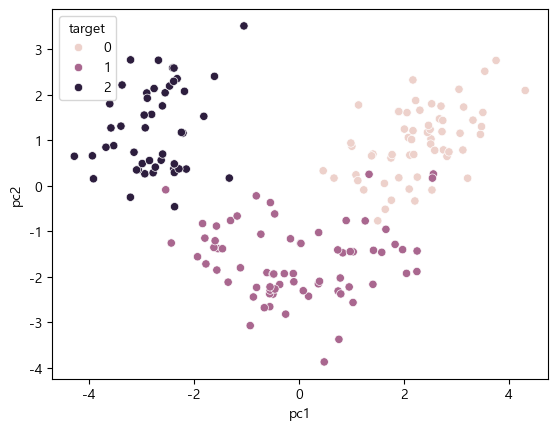

In [15]:
sb.scatterplot( pca_df, x='pc1', y='pc2', hue='target')
plt.show()

In [38]:
# 5분 퀴즈 연습문제 :  지지도 높은 2개 항목을 선택
data =[ {1: '삼겹살,상추'},{2:'삼겹살, 상추, 사이다'},{2:'삼겹살,깻잎'},
        {3:'닭고기,샤워타올'},{2:'닭고기,콜라,사이다'}] 

transactions = []
for d in data:
    for value in d.values():
        # 쉼표로 분리하고 각 아이템의 앞뒤 공백 제거
        items = [item.strip() for item in value.split(',')]
        transactions.append(items)
data=transactions

In [39]:
te = TransactionEncoder()
te_result = te.fit_transform( data)
df = pd.DataFrame( te_result, columns = te.columns_)
df

,깻잎,닭고기,사이다,삼겹살,상추,샤워타올,콜라
0,False,False,False,True,True,False,False
1,False,False,True,True,True,False,False
2,True,False,False,True,False,False,False
3,False,True,False,False,False,True,False
4,False,True,True,False,False,False,True


In [43]:
itemset = apriori( df,min_support=0.1, use_colnames=True)
itemset.nlargest(2,'support',keep='all')

,support,itemsets
3,0.6,(삼겹살)
1,0.4,(닭고기)
2,0.4,(사이다)
4,0.4,(상추)
14,0.4,"(삼겹살, 상추)"
